C:\Users\suriya\anaconda3\envs\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster centroids:
         Age    Gender  Item Purchased  Category  Purchase Amount (USD)  \
0  44.763521  0.682394       11.990794  1.023015              37.029919   
1  57.499053  0.675189       12.387311  0.995265              79.403409   
2  30.152803  0.680832       11.769439  0.974684              76.738698   

       Size      Color    Season  Review Rating  Subscription Status  \
0  1.090909  12.185846  1.506904       3.720656             0.276180   
1  1.128788  12.021780  1.454545       3.783144             0.267045   
2  1.157324  12.073237  1.507233       3.764286             0.263110   

   Shipping Type  Discount Applied  Promo Code Used  Previous Purchases  \
0       2.559264          0.436133         0.436133           25.169735   
1       2.475379          0.422348         0.422348           26.241477   
2       2.481013          0.427667         0.427667           24.787523   

   Payment Method  Frequency of Purchases  
0        2.539125                3.030495  
1 

C:\Users\suriya\anaconda3\envs\env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


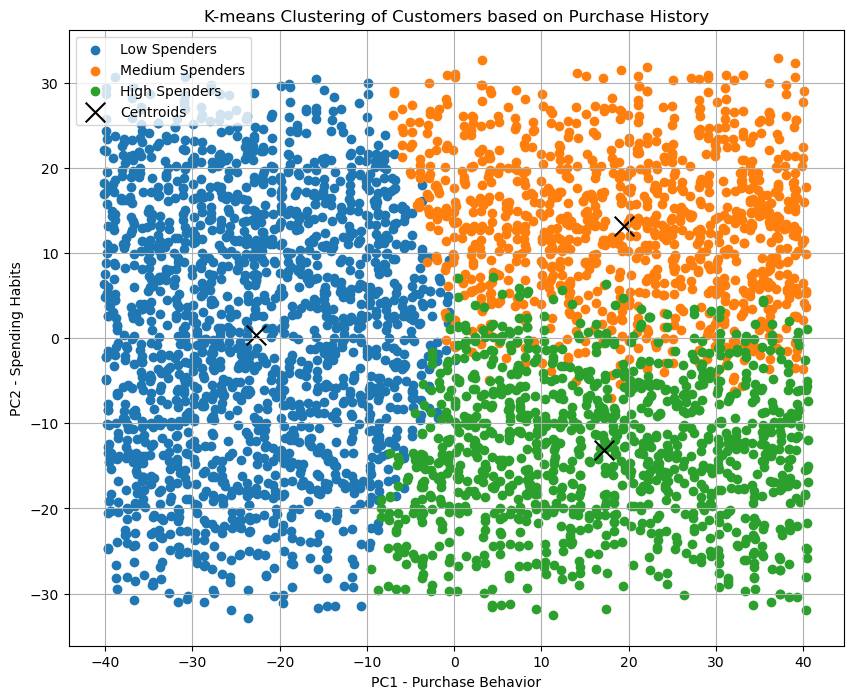

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


data_path = "C:\\INTERNPROJ\\prodigy infotech\\Task_2\\shopping_trends_updated.csv"
df = pd.read_csv(data_path)

# I drop the irrelevant columns from the dataset
df.drop(columns=['Customer ID', 'Location'], inplace=True)

# Converting categorical variables to numerical using Label Encoding Method
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Fill missing values 
df.fillna(0, inplace=True)

# Perform K-means clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(df)

# Add cluster labels to the dataframe
df['Cluster'] = kmeans.labels_

# Print cluster centroids
print("Cluster centroids:")
print(pd.DataFrame(kmeans.cluster_centers_, columns=df.columns[:-1]))

# Print cluster sizes
print("\nCluster sizes:")
print(df['Cluster'].value_counts())

# Visualize clusters
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop(columns=['Cluster']))

plt.figure(figsize=(10, 8))
for cluster in range(n_clusters):
    cluster_label = ""
    if cluster == 0:
        cluster_label = "Low Spenders"
    elif cluster == 1:
        cluster_label = "Medium Spenders"
    elif cluster == 2:
        cluster_label = "High Spenders"
    
    plt.scatter(df_pca[df['Cluster'] == cluster, 0], df_pca[df['Cluster'] == cluster, 1], label=cluster_label)

# Plot cluster centroids
centroid_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroid_pca[:, 0], centroid_pca[:, 1], marker='x', s=200, c='black', label='Centroids')

plt.title('K-means Clustering of Customers based on Purchase History')
plt.xlabel('PC1 - Purchase Behavior')
plt.ylabel('PC2 - Spending Habits')
plt.legend()
plt.grid(True)
plt.show()
